# 케라스(Keras) 기초부터 모델 생성까지

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png">

- 파이썬으로 작성된 고수준 신경망 API로 TensorFlow, CNTK, 혹은 Theano와 함께 사용 가능
- 사용자 친화성, 모듈성, 확장성을 통해 빠르고 간편한 프로토타이핑 가능
- 컨볼루션 신경망, 순환 신경망, 그리고 둘의 조합까지 모두 지원
- CPU와 GPU에서 매끄럽게 실행

In [1]:
import numpy as np
import tensorflow as tf

tf.__version__

'2.6.0'

레이어들을 import하는 방식 (1)
- 일일이 import 하지 않아도 됨

- 코드가 다소 길어질 수 있음

In [2]:
from tensorflow import keras

keras.__version__

'2.6.0'

In [3]:
keras.layers.Dense(10, activation='sigmoid')

In [4]:
keras.Model()

In [6]:
keras.models.Sequential()

레이어들을 import하는 방식 (2)
- 일일이 import 해야함
- 코드가 간결

In [7]:
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [9]:
Dense(10, activation='relu')

In [10]:
Flatten(input_shape=[28, 28])

In [12]:
X_train = np.random.rand(5500, 2)

Input(shape=X_train.shape[1:])

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'input_2')>

## 주요 레이어

### Dense
- Fully-Connected Layer

- 노드수(유닛수), 활성화 함수 등을 지정

- name을 통한 레이어간 구분 가능

- 기본적으로  
  'Glorot_uniform' 가중치, zeros bias로 초기화
  - kernel_initializer 인자를 통해 다른 가중치 초기화를 진행할 수 있음

In [13]:
dense = Dense(10, activation='relu', name='Dense Layer')

In [14]:
dense

In [15]:
dense2 = Dense(10, activation='softmax')

In [16]:
dense2

### Activation
- Dense layer에서 미리 활성화함수를 지정할 수도 있지만 때에 따라서 따로 레이어를 만들어줄 수 있음

In [17]:
dense = Dense(10, kernel_initializer='he_normal', name='Dense Layer')
dense = Activation(dense)
dense

### Flatten
- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업

- 예시)
        (128, 3, 2, 2) ---> (128, 12)
      

In [18]:
Flatten(input_shape=(28, 28))

### Input 
- 모델의 입력을 정의

- shape, dtype을 포함

- 하나의 모델은 여러 개의 입력을 가질 수 있음

- summary() 메소드를 통해서는 보이지 않음

In [19]:
input_1 = Input(shape=(28, 28), dtype=tf.float32)
input_2 = Input(shape=(8, ), dtype=tf.float32)

In [20]:
input_1

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_3')>

In [21]:
input_2

<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'input_4')>

## 모델 구성 방법
- Sequential()

- 서브클래싱(Subclassing)

- 함수형 API

### Sequential()

- 모델이 순차적으로 진행할 때 사용

- 간단한 방법
  - Sequential 객체 생성 후, **add**를 통한 방법
  
  - Sequential 인자에 한번에 추가

- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음


In [22]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model 

In [23]:
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

모델 구조 확인
- model 객체의 **summary()** 이용

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 300)           8700      
_________________________________________________________________
dense_4 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_5 (Dense)              (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


In [30]:
# plot_model(model)

In [31]:
# plot_model(model, to_file='model1.jpg')

In [28]:
model = Sequential([Input(shape=(28, 28), name='Input'),
                    Dense(300, activation='relu', name='Dense1'),
                    Dense(100, activation='relu', name='Dense2'),
                    Dense(10, activation='softmax', name='Output')])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
Dense2 (Dense)               (None, 28, 100)           30100     
_________________________________________________________________
Output (Dense)               (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


In [32]:
# plot_model(model)

In [33]:
# plot_model(model, to_file='model2.jpg')

### 함수형 API

- 가장 권장되는 방벚

- 모델을 복잡하고, 유연하게 구성 가능

- 다중 입출력을 다룰 수 있음

In [35]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model 

In [36]:
# 단일 입력, 단일 출력
inputs = Input(shape=(28, 28, 1))

x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [39]:
model = Model(inputs=inputs, outputs=x)

In [40]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
# plot_model(model)

In [42]:
# plot_model(model, to_file='model3.jpg)

In [43]:
from tensorflow.keras.layers import Concatenate

# Deep and Wide Model
input_layer = Input(shape=(28, 8))
hidden1 = Dense(100, activation='relu')(input_layer)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=[output])

In [44]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 28, 8)]      0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 28, 100)      900         input_7[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 28, 30)       3030        dense_9[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 38)       0           input_7[0][0]                    
                                                                 dense_10[0][0]             

In [45]:
# plot_model(model)

In [46]:
# plot_model(model, to_file='model4.jpg)

In [47]:
# 다중 입력, 단일 출력
input_1 = Input(shape=(10, 10), name='Input 1')
input_2 = Input(shape=(10, 28), name='Input 2')

hidden_1 = Dense(100, activation='relu')(input_2)
hidden_2 = Dense(10, activation='relu')(hidden_1)
concat = Concatenate()([input_1, hidden_2])
output = Dense(1, activation='sigmoid', name='Output')(concat)

model = Model(inputs=[input_1, input_2], outputs=[output])

In [48]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input 2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 10, 100)      2900        Input 2[0][0]                    
__________________________________________________________________________________________________
Input 1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 10, 10)       1010        dense_12[0][0]                   
____________________________________________________________________________________________

In [49]:
# plot_model(model)

In [ ]:
# plot_model(model, to_file='model5.jpg)

In [51]:
# 단일 입력, 다중 출력
input_ = Input(shape=(10, 10), name='Input_')
hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid', name='output')(hidden2)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_], outputs=[output, sub_out])

In [53]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 10, 100)      1100        Input_[0][0]                     
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 10, 10)       1010        dense_16[0][0]                   
__________________________________________________________________________________________________
output (Dense)                  (None, 10, 1)        11          dense_17[0][0]                   
____________________________________________________________________________________________

In [54]:
# plot_model(model)

In [55]:
# plot_model(model, to_file='model6.jpg')

In [56]:
# 다중 입력, 다중 출력
input_1 = Input(shape=(10, 10), name='Input 1')
input_2 = Input(shape=(10, 28), name='Input 2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='Main_Output')(concat)
sub_out = Dense(1, name='Sub_Output')(hidden2)

model = Model(inputs=[input_1, input_2], outputs=[output, sub_out])

In [57]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input 2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 10, 100)      2900        Input 2[0][0]                    
__________________________________________________________________________________________________
Input 1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 10, 10)       1010        dense_18[0][0]                   
____________________________________________________________________________________________

In [58]:
# plot_model(model)

In [59]:
# plot_model(model, to_file='model7.jpg)

### 서브클래싱(Subclassing)
- 커스터마이징에 최적화된 방법

- Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음  
  - `fit()`, `evaluate()`, `predict()`
  - `save()`, `load()`

- 주로 `call()` 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등

- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때  
  해석할 수 있어야함

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [3]:
class MyModel(Model):
    def __init__(self, units=30, activation='relu', **kwarg):
        super(MyModel, self).__init__(**kwarg)

        self.dense_layer1 = Dense(300, activation=activation)
        self.dense_layer2 = Dense(100, activation=activation)
        self.dense_layer3 = Dense(units, activation=activation)

        self.output_layer = Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)
        x = self.dense_layer3(x)
        x = self.output_layer(x)
        return x

## 모델 가중치 확인

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [6]:
inputs = Input(shape=(28, 28, 1))

x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


모델의 레이어들이 리스트로 표현됨


In [8]:
model.layers

In [10]:
hidden_2 = model.layers[2]
hidden_2.name

'dense'

위의 layer name 참고

In [12]:
model.get_layer('dense') is hidden_2

True

In [13]:
weights, bias = hidden_2.get_weights()

In [14]:
weights

array([[-0.04417797,  0.01794915, -0.06571032, ..., -0.00253475,
        -0.07124581,  0.07151853],
       [-0.04441695, -0.01416636,  0.05315086, ...,  0.01199827,
        -0.03198626, -0.06419954],
       [-0.00461274,  0.02185454, -0.05284446, ..., -0.02342105,
         0.04445601, -0.00512491],
       ...,
       [-0.02543237, -0.0363336 , -0.02047285, ...,  0.04321747,
         0.06864636,  0.07262781],
       [ 0.00764433, -0.02716276,  0.0452457 , ..., -0.01027047,
         0.04992094, -0.00680706],
       [-0.04546686,  0.02993852, -0.07385076, ...,  0.03431576,
         0.07229817,  0.06484193]], dtype=float32)

In [15]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
print(weights.shape)
print(bias.shape)

(784, 300)
(300,)


## 모델 컴파일(compile)

- 모델을 구성한 후, 사용할 손실함수(loss), 옵티마이저(optimizer)를 지정


In [17]:
model.compile(loss='spase_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

### 참고1

#### loss
- `keras.losses.sparse_categorical_crossentropy` 등과 같이 지정 가능
  - `sparse_categorical_crossentropy`  
    클래스가 배타적, 즉 MNIST 예제에서 (0, 1, 2, ..., 9)와 같은 방식으로 구분되어 있을 때 사용

  - `categorical_cross_entropy`
    클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용

  - `binary_crossentropy`
  이진 분류를 수행할 때 사용


#### optimizer
- `keras.optimizer.SGD()` 등과 같이 사용 가능
  - 보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일    
        optimizer = keras.optimizer.SGD(learning_rate=1e-5)  
        model.compile(...,
                      optimizer=optimzer,
                      ...)

- `keras.optimizer.Adam()` 도 많이 사용

#### metrics
- 모니터링할 지표

- 주로 'accuracy', 'acc'로도 가능


### 참고2 - 컴파일 설정 예시
- 평균 제곱 오차 회귀 문제  
      model.compile(loss = 'mse',  
                    optimizer = RMSprop(),  
                    metrics=['mae'])

- 이진 분류
      model.compile(loss = 'binary_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])



- 다항 분류
      model.compile(loss = 'categorical_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])
 


## 모델 훈련, 평가 및 예측
- `fit()` 함수

  - train_data(학습 데이터), train_label(데이터의 정답)
  
  - epochs
  
  - batch_size
  
  - validation_data

- `evaluate()` 함수
  - 테스트 데이터


- `predict()`
  임의의 데이터를 인자로 넣어 예측 가능

## MNIST 예제를 통해 모델 구성하기

- keras.datasets 에 포함되어 있는 데이터셋

  <img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" width="400">

  <sub>출처: https://www.tensorflow.org/datasets/catalog/mnist</sub>

### modules import

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터셋 로드
- MNIST 데이터셋을 로드

- Train Data 중, 30%를 검증 데이터(valiation data)로 사용


In [2]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnist.npz',)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                    test_size=0.3,
                                                    random_state=111)

### 데이터 확인

In [3]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

In [12]:
print("전체 데이터: {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {}\t레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {}\t레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {}\t레이블: {}".format(x_test.shape, y_test.shape))

전체 데이터: (60000, 28, 28)	레이블: (60000,)
학습 데이터: (42000, 28, 28)	레이블: (42000,)
검증 데이터: (18000, 28, 28)	레이블: (18000,)
테스트 데이터: (10000, 28, 28)	레이블: (10000,)


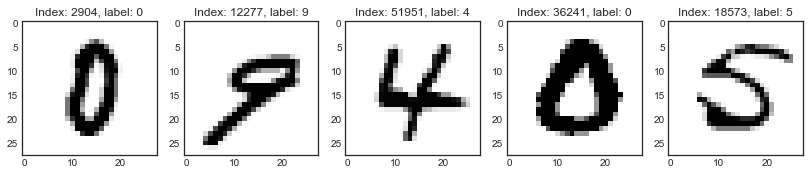

In [14]:
num_sample = 5

random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(14, 8))
for i, idx in enumerate(random_idxs):
    img = x_train_full[idx, :]
    label = y_train_full[idx]

    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(img)
    plt.title("Index: {}, label: {}".format(idx, label))

In [15]:
y_train[0]

8

### 데이터 전처리
- Normalization

In [16]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [17]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

### 모델 구성 (Sequential)

In [18]:
model = Sequential([Input(shape=(28, 28), name='input'),
                    Flatten(input_shape=[28, 28], name='flatten'),
                    Dense(100, activation='relu', name='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    Dense(10, activation='softmax', name='output')])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [24]:
# plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [21]:
# plot_model(model, show_shapes=True)

### 모델 컴파일

In [25]:
model.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [26]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 4s 10ms/step - loss: 1.6822 - accuracy: 0.5096 - val_loss: 0.9621 - val_accuracy: 0.7749
Epoch 2/50
329/329 [==============================] - 3s 8ms/step - loss: 0.6800 - accuracy: 0.8292 - val_loss: 0.5311 - val_accuracy: 0.8517
Epoch 3/50
329/329 [==============================] - 3s 8ms/step - loss: 0.4660 - accuracy: 0.8714 - val_loss: 0.4191 - val_accuracy: 0.8792
Epoch 4/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3920 - accuracy: 0.8898 - val_loss: 0.3733 - val_accuracy: 0.8909
Epoch 5/50
329/329 [==============================] - 2s 6ms/step - loss: 0.3500 - accuracy: 0.9004 - val_loss: 0.3320 - val_accuracy: 0.9044
Epoch 6/50
329/329 [==============================] - 2s 6ms/step - loss: 0.3205 - accuracy: 0.9089 - val_loss: 0.3189 - val_accuracy: 0.9062
Epoch 7/50
329/329 [==============================] - 5s 14ms/step - loss: 0.2977 - accuracy: 0.9149 - val_loss: 0.3170 - val_accuracy: 0.9062
Epoc

### 학습 결과 시각화

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

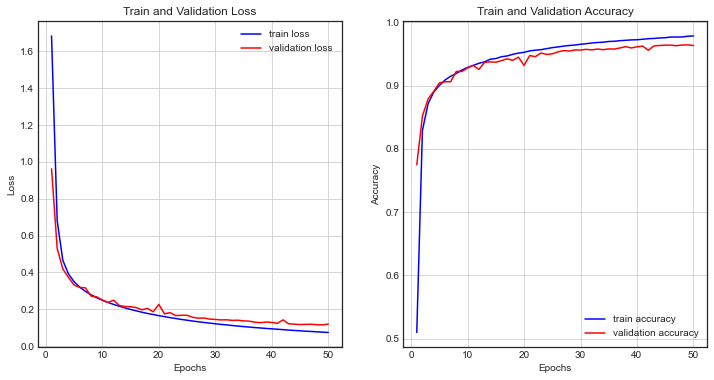

In [29]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train loss')
ax1.plot(epochs, val_loss, color='red', label='validation loss')
ax1.set_title("Train and Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='validation accuracy')
ax2.set_title("Train and Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 (1)
- evaluate

In [30]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1222 - accuracy: 0.9641


[0.12215697020292282, 0.9641000032424927]

### 학습된 모델을 통해 값 예측

In [31]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(precision=7)
print(pred_ys[0])

(10000, 10)
[7.0251879e-08 5.7895075e-08 1.2957017e-06 3.9945167e-05 2.2854554e-09
 3.3112454e-07 2.4418521e-11 9.9995732e-01 9.7239543e-08 9.4740153e-07]


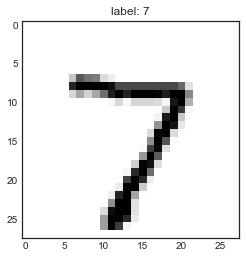

In [33]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.imshow(x_test[0])
plt.title("label: {}".format(arg_pred_y[0]))
plt.show()

### 모델 평가 (2)
- 혼동행렬 (Confusion Maxtrix)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

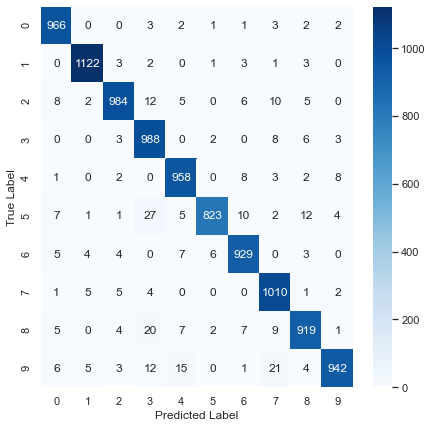

In [41]:
plt.figure(figsize=(7, 7))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 모델 평가 (3)
- 분류 보고서

In [42]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.95      0.96      1032
           3       0.93      0.98      0.95      1010
           4       0.96      0.98      0.97       982
           5       0.99      0.92      0.95       892
           6       0.96      0.97      0.97       958
           7       0.95      0.98      0.96      1028
           8       0.96      0.94      0.95       974
           9       0.98      0.93      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



## 모델 저장과 복원
- `save()`

- `load_model()`

- (주의)  
  시퀀셜 API, 함수형 API에서는 **모델**의 저장 및 로드기 가능하지만 서브클래싱 방식으로는 할 수 없음  
  
  서브클래싱 방식
      save_weights()
      load_weights()  
  위 두가지를 통해 **모델의 파라미터**만 저장 및 로드


- JSON 형식
  - `model.to_json()` (저장)

  - `tf.keras.models.model_from_json(file_path)` (복원)

- YAML로 직렬화
  - `model.to_yaml()` (저장)

  - `tf.keras.models.model_from_yaml(file_path)` (복원)


In [43]:
model.save('mnist_model.h5')

In [44]:
loaded_model = models.load_model('mnist_model.h5')

In [45]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [48]:
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)

np.set_printoptions(precision=7)
print(pred_ys2[0])

(10000, 10)
[7.0251879e-08 5.7895075e-08 1.2957017e-06 3.9945167e-05 2.2854554e-09
 3.3112454e-07 2.4418521e-11 9.9995732e-01 9.7239543e-08 9.4740153e-07]


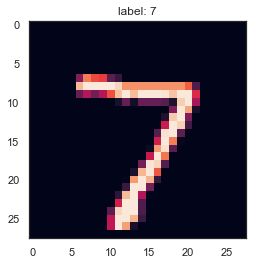

In [51]:
arg_pred_y2 = np.argmax(pred_ys2, axis=1)

plt.imshow(x_test[0])
plt.title("label: {}".format(arg_pred_y2[0]))
plt.show()

## 콜백 (Callbacks)

- `fit()` 함수의 callbacks 매개변수를 사용하여 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음

- 여러 개 사용 가능

- ModelCheckpoint
  - `tf.keras.callbacks.ModelCheckpoint`
  - 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

- EarlyStopping
  - `tf.keras.callbacks.EarlyStopping`
  - 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용

- LearningRateSchduler
  - `tf.keras.callbacks.LearningRateSchduler`
  - 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용

- TensorBoard
  - `tf.keras.callbacks.TensorBoard`
  - 모델의 경과를 모니터링할 때 사용


In [54]:
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnist.npz',)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                    test_size=0.3,
                                                    random_state=111)

print("전체 데이터: {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {}\t레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {}\t레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {}\t레이블: {}".format(x_test.shape, y_test.shape))

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

def build_model():
    model = Sequential([Input(shape=(28, 28), name='input'),
                    Flatten(input_shape=[28, 28], name='flatten'),
                    Dense(100, activation='relu', name='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    Dense(10, activation='softmax', name='output')])
    
    model.compile(loss='categorical_crossentropy',
                    optimizer='sgd',
                    metrics=['accuracy'])

    return model

model = build_model()
model.summary()

전체 데이터: (60000, 28, 28)	레이블: (60000,)
학습 데이터: (42000, 28, 28)	레이블: (42000,)
검증 데이터: (18000, 28, 28)	레이블: (18000,)
테스트 데이터: (10000, 28, 28)	레이블: (10000,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_____________________________

In [60]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard

### ModelCheckpoint

In [57]:
check_point_cb = ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10, callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.7993 - accuracy: 0.7742
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3224 - accuracy: 0.9068
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2615 - accuracy: 0.9246
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2238 - accuracy: 0.9355
Epoch 5/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.1964 - accuracy: 0.9430
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1756 - accuracy: 0.9485
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1578 - accuracy: 0.9545
Epoch 8/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1426 - accuracy: 0.9586
Epoch 9/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1300 - accuracy: 0.9623
Epoch 10/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.119

In [58]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [61]:
loaded_model = load_model("keras_mnist_model.h5")
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


최상의 모델만을 저장
- save_best_only=True

In [63]:
model = build_model()

cp = ModelCheckpoint('keras_best_model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val), callbacks=[cp])

Epoch 1/10
1313/1313 [==============================] - 8s 5ms/step - loss: 0.8313 - accuracy: 0.7689 - val_loss: 0.3828 - val_accuracy: 0.8844
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3293 - accuracy: 0.9048 - val_loss: 0.3154 - val_accuracy: 0.9045
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2647 - accuracy: 0.9234 - val_loss: 0.2475 - val_accuracy: 0.9251
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2212 - accuracy: 0.9361 - val_loss: 0.2201 - val_accuracy: 0.9335
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1909 - accuracy: 0.9446 - val_loss: 0.1957 - val_accuracy: 0.9417916 - accu
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1678 - accuracy: 0.9515 - val_loss: 0.1833 - val_accuracy: 0.9446
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1491 - accuracy: 0.9570 - val_loss: 0.1832 - val

In [67]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [68]:
loaded_model2 = load_model('keras_best_model.h5')
loaded_model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping
- 일정 에포크(patience) 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈춤

- 모델이 향상되지 않으면 학습이 자동으로 중지되므로,  
  에포크(epochs) 숫자를 크게 해도 무방

- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요없음

In [69]:
model = build_model()

cp = ModelCheckpoint('keras_best_mode.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, monitor='val_loss',
                                    restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50,
                    validation_data = (x_val, y_val), callbacks=[cp, early_stopping_cb])

Epoch 1/50
1313/1313 [==============================] - 8s 6ms/step - loss: 0.9109 - accuracy: 0.7418 - val_loss: 0.3871 - val_accuracy: 0.8896
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3421 - accuracy: 0.9005 - val_loss: 0.3083 - val_accuracy: 0.9102
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2723 - accuracy: 0.9211 - val_loss: 0.2509 - val_accuracy: 0.9278
Epoch 4/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2297 - accuracy: 0.9335 - val_loss: 0.2246 - val_accuracy: 0.9356
Epoch 5/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1984 - accuracy: 0.9429 - val_loss: 0.2092 - val_accuracy: 0.9398
Epoch 6/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1765 - accuracy: 0.9490 - val_loss: 0.1890 - val_accuracy: 0.9458
Epoch 7/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1575 - accuracy: 0.9539 - val_loss: 0.1785 - val_accuracy:

### LearningRateScheduler

In [70]:
def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)

In [72]:
model = build_model()

round(model.optimizer.lr.numpy(), 5)

0.01

In [73]:
lr_scheduler_cb = LearningRateScheduler(scheduler)
history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)
round(model.optimizer.lr.numpy(), 5)

0.00607

### Tensorboard
- 텐서보드를 이용하여 학습과정 모니터링

텐서보드를 사용하기 위해 logs폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성

In [75]:
TensorBoard(log_dir='.logs', histogram_freq=0,
            write_graph=True, write_images=True)

In [76]:
log_dir = './logs'

tensor_board_cb = [TensorBoard(log_dir = log_dir, histogram_freq=1,
                    write_graph=True, write_images=True)]

model = build_model()

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30,
            callbacks=[tensor_board_cb])

Epoch 1/30
1313/1313 [==============================] - 11s 8ms/step - loss: 0.9095 - accuracy: 0.7302 - val_loss: 0.3617 - val_accuracy: 0.8943
Epoch 2/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3197 - accuracy: 0.9082 - val_loss: 0.2940 - val_accuracy: 0.9117
Epoch 3/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2560 - accuracy: 0.9255 - val_loss: 0.2389 - val_accuracy: 0.9308
Epoch 4/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2165 - accuracy: 0.9381 - val_loss: 0.2183 - val_accuracy: 0.9361
Epoch 5/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1894 - accuracy: 0.9447 - val_loss: 0.1977 - val_accuracy: 0.9436
Epoch 6/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1677 - accuracy: 0.9504 - val_loss: 0.1794 - val_accuracy: 0.9479
Epoch 7/30
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1504 - accuracy: 0.9564 - val_loss: 0.1722 - val_accur

In [77]:
%load_ext tensorboard

load하는데 시간 소요

- load가 안된다면 port번호를 바꿔서 실행!  
  ex) %tensorboard --logdir {log_dir} port 8000

In [79]:
%tensorboard --logdir {log_dir}

Reusing TensorBoard on port 6006 (pid 30402), started 0:00:39 ago. (Use '!kill 30402' to kill it.)